<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Visualization**


#### Student Author: Abigail Hedden

## Objectives


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition and comparison of data.




## Set-up

In [89]:
# install necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import sqlite3
import textwrap

In [21]:
# download database file
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

--2025-07-10 13:30:51--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv.1’

survey-data.csv.1   100%[===================>] 152.13M  48.3MB/s    in 3.1s    

2025-07-10 13:30:55 (48.3 MB/s) - ‘survey-data.csv.1’ saved [159525875/159525875]



In [22]:
# load in dataset
df = pd.read_csv('survey-data.csv')
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Create database in SQLite and insert data

In [23]:
# create a connection to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# write the df to the SQLite database
df.to_sql('main', conn, if_exists='replace', index=False)

# close the connection
conn.close()

/Users/agshivers/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:2779: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  sql.to_sql(


**Verify the Data in the SQLite Database**
Verify that the data has been correctly inserted into the SQLite database:


In [24]:
conn = sqlite3.connect('survey-data.sqlite')
QUERY = "SELECT * FROM main LIMIT 5"
df_check = pd.read_sql_query(QUERY, conn)

print(df_check)
#verified

   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time       None  Apples   
4   Student, full-time       None  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                               None   
4                                 

## Run SQL queries to inspect data

### Count the number of rows in the table named 'main'


In [25]:
QUERY = """
SELECT COUNT(*) 
FROM main
"""
num_rows = pd.read_sql_query(QUERY, conn)
num_rows.head()

,COUNT(*)
0,65437


### List all tables in the database

In [26]:
QUERY = """
SELECT name as Table_Name FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)

,Table_Name
0,main


### Count number of respondents in each age group 
Practice running group by queries

In [27]:
QUERY = """
SELECT Age, COUNT(*) as count
FROM main
GROUP BY Age
ORDER BY Age
"""
pd.read_sql_query(QUERY, conn)

,Age,count
0,18-24 years old,14098
1,25-34 years old,23911
2,35-44 years old,14942
3,45-54 years old,6249
4,55-64 years old,2575
5,65 years or older,772
6,Prefer not to say,322
7,Under 18 years old,2568


### Obtain schema of table

In [28]:
table_name = 'main'

QUERY = """
SELECT sql FROM sqlite_master 
WHERE name= '{}'
""".format(table_name)

schema = pd.read_sql_query(QUERY, conn)
print(schema.iat[0,0])


CREATE TABLE "main" (
"ResponseId" INTEGER,
  "MainBranch" TEXT,
  "Age" TEXT,
  "Employment" TEXT,
  "RemoteWork" TEXT,
  "Check" TEXT,
  "CodingActivities" TEXT,
  "EdLevel" TEXT,
  "LearnCode" TEXT,
  "LearnCodeOnline" TEXT,
  "TechDoc" TEXT,
  "YearsCode" TEXT,
  "YearsCodePro" TEXT,
  "DevType" TEXT,
  "OrgSize" TEXT,
  "PurchaseInfluence" TEXT,
  "BuyNewTool" TEXT,
  "BuildvsBuy" TEXT,
  "TechEndorse" TEXT,
  "Country" TEXT,
  "Currency" TEXT,
  "CompTotal" REAL,
  "LanguageHaveWorkedWith" TEXT,
  "LanguageWantToWorkWith" TEXT,
  "LanguageAdmired" TEXT,
  "DatabaseHaveWorkedWith" TEXT,
  "DatabaseWantToWorkWith" TEXT,
  "DatabaseAdmired" TEXT,
  "PlatformHaveWorkedWith" TEXT,
  "PlatformWantToWorkWith" TEXT,
  "PlatformAdmired" TEXT,
  "WebframeHaveWorkedWith" TEXT,
  "WebframeWantToWorkWith" TEXT,
  "WebframeAdmired" TEXT,
  "EmbeddedHaveWorkedWith" TEXT,
  "EmbeddedWantToWorkWith" TEXT,
  "EmbeddedAdmired" TEXT,
  "MiscTechHaveWorkedWith" TEXT,
  "MiscTechWantToWorkWith" TEXT,


## Data visualization

### Visualizing the Distribution of Data

#### Plot the distribution of CompTotal (Total Compensation) with a histogram

In [40]:
# show top 20 largest CompTotal values
print(df[df['CompTotal'].notnull()].sort_values('CompTotal', ascending=False)['CompTotal'].head(20))

# examine stats of variable for plotting
print(df['CompTotal'].describe())
print(df['CompTotal'].sort_values(ascending=False).head(10))

# calculate median 
median_value = filtered["CompTotal"].median()
print('median=', median_value)

# mean = ~1e145 but the median is $110,000, and 75% of data is under $250,000

14354    1.000000e+150
34278     1.000000e+65
17374     1.000000e+53
8814      1.000000e+44
20037     8.000000e+27
24677     1.000000e+20
27268     1.111111e+15
52485     3.040302e+14
46992     7.587459e+13
59887     7.777778e+12
623       1.000000e+11
9732      5.000000e+10
34842     5.000000e+10
36299     4.800000e+10
42148     3.000000e+10
33112     3.000000e+10
50447     2.040000e+10
11066     1.860000e+10
51437     1.660000e+10
39289     1.500000e+10
Name: CompTotal, dtype: float64
count     3.374000e+04
mean     2.963841e+145
std      5.444117e+147
min       0.000000e+00
25%       6.000000e+04
50%       1.100000e+05
75%       2.500000e+05
max      1.000000e+150
Name: CompTotal, dtype: float64
14354    1.000000e+150
34278     1.000000e+65
17374     1.000000e+53
8814      1.000000e+44
20037     8.000000e+27
24677     1.000000e+20
27268     1.111111e+15
52485     3.040302e+14
46992     7.587459e+13
59887     7.777778e+12
Name: CompTotal, dtype: float64
median= 95000.0


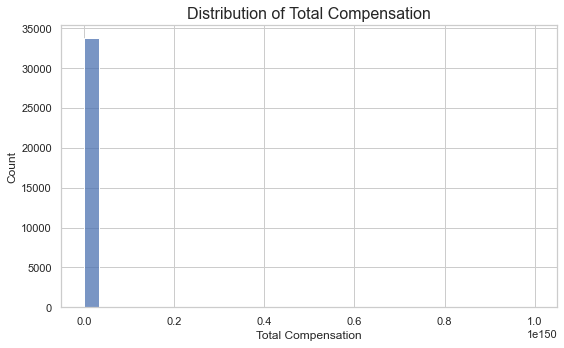

In [35]:
# quickly plot
sns.set_theme(style="whitegrid")
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x="CompTotal", bins=30)
plt.title("Distribution of Total Compensation", fontsize=16)
plt.xlabel("Total Compensation", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.tight_layout()
plt.show()

# may need to remove some outliers for better visualization
# most data is under $250k, remove comp > 1,000,000

<ipython-input-42-e1ef5958f764>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered["CompTotal_K"] = filtered["CompTotal"]/1000
<ipython-input-42-e1ef5958f764>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


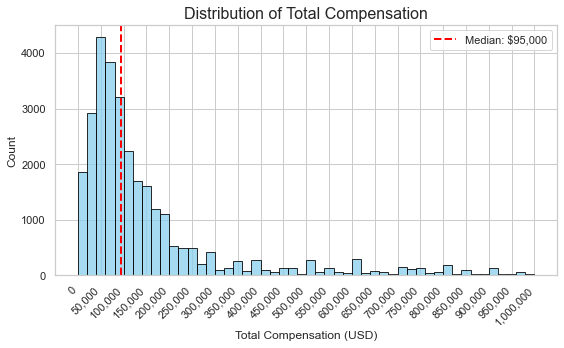

In [42]:
# Filter to reasonable compensation range
filtered = df[(df["CompTotal"]>0)&(df["CompTotal"]<1000000)]

filtered["CompTotal_K"] = filtered["CompTotal"]/1000

plt.figure(figsize=(8, 5))
ax = sns.histplot(
    data=filtered,
    x="CompTotal",
    bins=50,
    color="skyblue", 
    edgecolor="black"
)

# title and axes customization
ax.set_title("Distribution of Total Compensation", fontsize=16)
ax.set_xlabel("Total Compensation (USD)", fontsize=12)
ax.set_ylabel("Count", fontsize=12)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f"{int(x):,}"))
ax.set_xticks(np.arange(0, 1000001, 50000))

# plot median 
plt.axvline(median_value, color='red', linestyle='--', linewidth=2, label=f"Median: ${int(median_value):,}")
plt.legend()

plt.tight_layout()
plt.show()

#### Plot the distribution of Age with a bar plot 
*original assignment instructed to use a box plot, but the age variable in the provided dataset is categorical, so I chose to use a bar plot instead*


In [44]:
df.Age

0        Under 18 years old
1           35-44 years old
2           45-54 years old
3           18-24 years old
4           18-24 years old
                ...        
65432       18-24 years old
65433       25-34 years old
65434       25-34 years old
65435       18-24 years old
65436       18-24 years old
Name: Age, Length: 65437, dtype: object

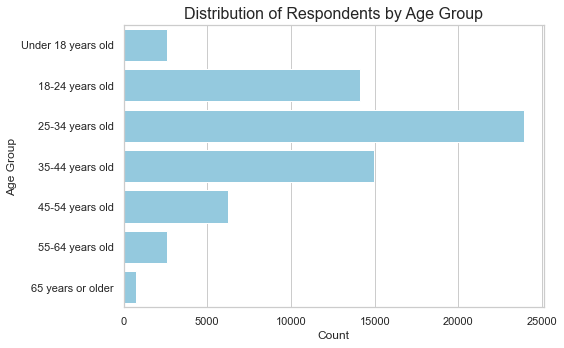

In [46]:
# drop null
age_data = df["Age"].dropna()

# plot
sns.set_theme(style="whitegrid")
# set an order for plotting
age_order = [
    "Under 18 years old",
    "18-24 years old",
    "25-34 years old",
    "35-44 years old",
    "45-54 years old",
    "55-64 years old",
    "65 years or older"
]

plt.figure(figsize=(8, 5))
ax = sns.countplot(
    data=df,
    y="Age",
    order=age_order,
    color="skyblue"
)

ax.set_title("Distribution of Respondents by Age Group", fontsize=16)
ax.set_xlabel("Count", fontsize=12)
ax.set_ylabel("Age Group", fontsize=12)

plt.tight_layout()
plt.show()

### Visualizing Relationships in Data

#### Create a scatter plot of Age and WorkExp
*original assignment was to create a scatter plot with age and work experience, but the provided data included age as a categorical variable, not numeric. so I chose to code the age variable as the midpoint of that age group. I also visualzied the categorical variables below

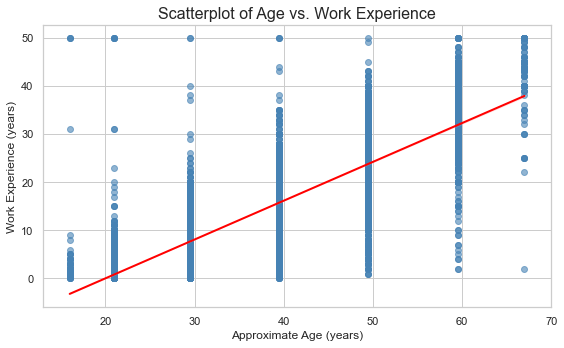

In [54]:
# code midpoints
age_midpoints = {
    "Under 18 years old": 16,
    "18-24 years old": 21,
    "25-34 years old": 29.5,
    "35-44 years old": 39.5,
    "45-54 years old": 49.5,
    "55-64 years old": 59.5,
    "65 years or older": 67
}

df["AgeMid"] = df["Age"].map(age_midpoints)

scatter_data = df[df["AgeMid"].notnull() & df["WorkExp"].notnull()]

plt.figure(figsize=(8,5))
# for just scatter
# sns.scatterplot(data=scatter_data, x="AgeMid", y="WorkExp", color="steelblue", alpha=0.6)
# plot both data points and linear regression line
sns.regplot(
    data=scatter_data,
    x="AgeMid",
    y="WorkExp",
    scatter_kws={"color":"steelblue", "alpha":0.6},
    line_kws={"color":"red", "linewidth":2},
    ci=95            
)

plt.title("Scatterplot of Age vs. Work Experience", fontsize=16)
plt.xlabel("Approximate Age (years)", fontsize=12)
plt.ylabel("Work Experience (years)", fontsize=12)
plt.xlim(13,70)
plt.tight_layout()
plt.show()


## Create a bubble plot of `TimeSearching` and `WorkExp` using the Age column as the bubble size
*as with the scatter plot, I used the midpoints of each age group to make a numerical age variable*
*original assignment was to use frustration, but frustration column was not an appropriate variable for this plot type*

In [61]:
# since TimeSearching and Frustration are both categorical, convert to numerical for plotting
time_mapping = {
    "Less than 15 minutes a day": 7.5,
    "15-30 minutes a day": 22.5,
    "30-60 minutes a day": 45,
    "60-120 minutes a day": 90,
    "Over 120 minutes a day": 150
}

df["TimeSearchingNum"] = df["TimeSearching"].map(time_mapping)

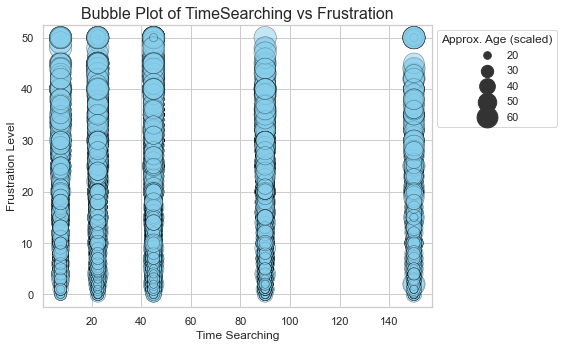

In [67]:
# filter rows to exclude null data
bubble_data = df[df["TimeSearchingNum"].notnull() & df["WorkExp"].notnull() & df["AgeMid"].notnull()]

plt.figure(figsize=(8, 5))
ax = sns.scatterplot(
    data=bubble_data,
    x="TimeSearchingNum",
    y="WorkExp",
    size="AgeMid",
    sizes=(20, 500),
    alpha=0.5,
    color="skyblue",
    edgecolor="black",
    linewidth=0.5
)

ax.set_title("Bubble Plot of TimeSearching vs Frustration", fontsize=16)
ax.set_xlabel("Time Searching", fontsize=12)
ax.set_ylabel("Frustration Level", fontsize=12)

ax.legend(title="Approx. Age (scaled)", loc="upper left", bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()

# no interesting relationships

### Visualizing Composition of Data

#### Create a pie chart of the top 5 databases(`DatabaseWantToWorkWith`) that respondents wish to learn next year.


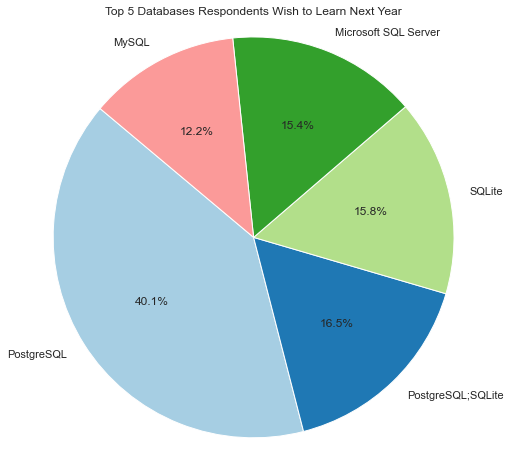

In [70]:
# identify the top 5 databases 
top_databases = df['DatabaseWantToWorkWith'].value_counts().nlargest(5)

plt.figure(figsize=(8, 8))
plt.pie(
    top_databases,
    labels=top_databases.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.Paired.colors
)
plt.title('Top 5 Databases Respondents Wish to Learn Next Year')
plt.axis('equal')  # Ensures pie chart is circular
plt.show()


**Stacked Charts** 

Create a stacked bar chart of median `TimeSearching` and `TimeAnswering` for the age group 30 to 35.


In [72]:
df.Age.unique()
# 2 age groups would make this up, 25-34 and 35-44

array(['Under 18 years old', '35-44 years old', '45-54 years old',
       '18-24 years old', '25-34 years old', '55-64 years old',
       'Prefer not to say', '65 years or older'], dtype=object)

In [77]:
# TimeSearching and TimeAnswering are both categorical; need to convert to numerical for plotting purposes
# map onto numerical values

time_mapping = {
    'Less than 15 minutes a day': 7.5,
    '15-30 minutes a day': 22.5,
    '30-60 minutes a day': 45,
    '60-120 minutes a day': 90,
    'Over 120 minutes a day': 150
}

# map the categorical times to numeric values
df['TimeSearchingNum'] = df['TimeSearching'].map(time_mapping)
df['TimeAnsweringNum'] = df['TimeAnswering'].map(time_mapping)


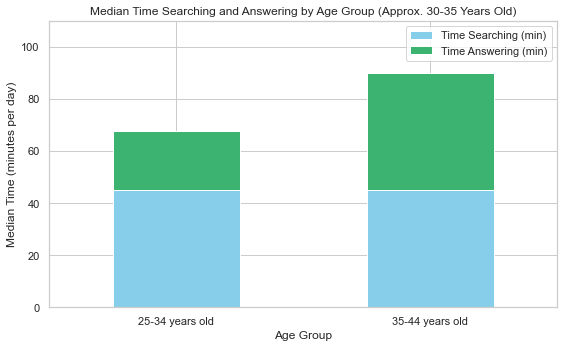

In [80]:
# select age categories covering approximately ages 30-35 (both groups)
age_categories = ['25-34 years old', '35-44 years old']
age_group_data = df[df['Age'].isin(age_categories)]

# calculate median times per age group
median_times = age_group_data.groupby('Age')[['TimeSearchingNum', 'TimeAnsweringNum']].median()

median_times.rename(columns={'TimeSearchingNum': 'Time Searching (min)', 'TimeAnsweringNum': 'Time Answering (min)'}, inplace=True)

median_times.plot(kind='bar', stacked=True, color=['#87CEEB', '#3CB371'], figsize=(8,5))

plt.title('Median Time Searching and Answering by Age Group (Approx. 30-35 Years Old)')
plt.ylabel('Median Time (minutes per day)')
plt.xlabel('Age Group')
plt.xticks(rotation=0)
plt.ylim(0,110)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()


### Visualizing Comparison of Data

#### Plot the median `CompTotal` for all ages from 45 to 60.
*as with the stacked bar chart above, 2 age groups fit this criteria*

AttributeError: module 'matplotlib.pyplot' has no attribute 't'

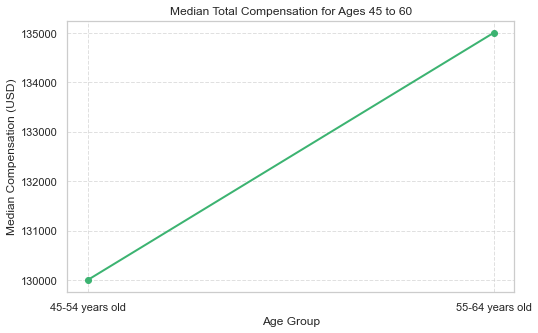

In [81]:
# convert compensation to numeric
df['CompTotal'] = pd.to_numeric(df['CompTotal'], errors='coerce')

# define age categories that include ages 45–60
age_categories2 = ['45-54 years old', '55-64 years old']

# Filter relevant age groups
filtered_df = df[df['Age'].isin(age_categories2)]

# Group by age and calculate median compensation
median_comp = filtered_df.groupby('Age')['CompTotal'].median().sort_index()

# Plot line chart
plt.figure(figsize=(8, 5))
plt.plot(median_comp.index, median_comp.values, marker='o', color='#3CB371', linewidth=2)

plt.title('Median Total Compensation for Ages 45 to 60')
plt.xlabel('Age Group')
plt.ylabel('Median Compensation (USD)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.t

# this isn't the best representation since the new provided data has age as a categorical variable, so there are only 2 data points. 
# plotted box plots below for better visuzalization

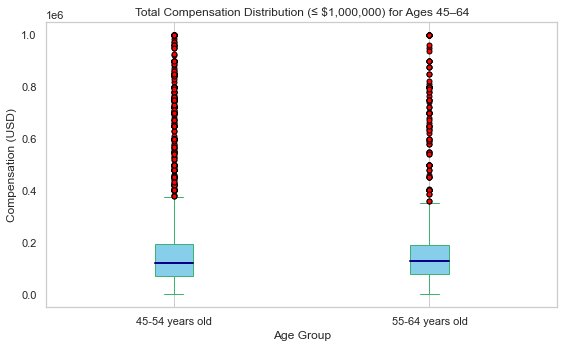

In [83]:
df_comp_filtered = df[df['CompTotal'] <= 1000000]

age_categories = ['45-54 years old', '55-64 years old']

comp_age_filtered_df = df_comp_filtered[df_comp_filtered['Age'].isin(age_categories)]

data_to_plot = [
    comp_age_filtered_df.loc[comp_age_filtered_df['Age'] == age, 'CompTotal'].dropna()
    for age in age_categories
]

plt.figure(figsize=(8,5))
plt.boxplot(
    data_to_plot,
    labels=age_categories,
    patch_artist=True,
    boxprops=dict(facecolor='#87CEEB', color='#3CB371'),
    medianprops=dict(color='darkblue', linewidth=2),
    whiskerprops=dict(color='#3CB371'),
    capprops=dict(color='#3CB371'),
    flierprops=dict(markerfacecolor='red', marker='o', markersize=5, linestyle='none')
)

plt.title('Total Compensation Distribution (≤ $1,000,000) for Ages 45–64')
plt.ylabel('Compensation (USD)')
plt.xlabel('Age Group')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


#### Create a horizontal bar chart using the `MainBranch` column.


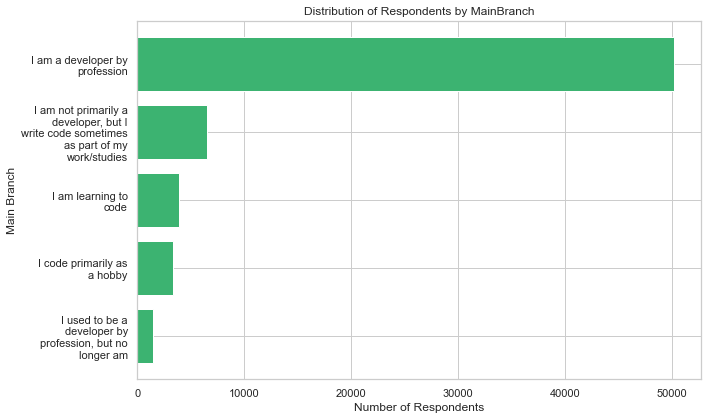

In [90]:
# count num respondents in each branch
mainbranch_counts = df['MainBranch'].value_counts().sort_values()

# wrap long category names
wrapped_labels = [
    '\n'.join(textwrap.wrap(label, width=20))
    for label in mainbranch_counts.index
]

# plot
plt.figure(figsize=(10,6))
plt.barh(wrapped_labels, mainbranch_counts.values, color='#3CB371')

plt.title('Distribution of Respondents by MainBranch')
plt.xlabel('Number of Respondents')
plt.ylabel('Main Branch')
plt.tight_layout()
plt.show()


### Close the Database Connection

In [91]:
conn.close()

## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
